# University of Houston faculty data

Create data frame using data from [The University of Houston website](https://www.uh.edu/ir/reports/statistical-handbook/student-enrollment/)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Student data

In [2]:
year = [i for i in range(2014, 2025)]

year

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [3]:
# enrollment
total_faculty = [2316, #2014
                 2554, #2015
                 2617, #2016
                 2685, #2017
                 2757, #2018
                 2774, #2019
                 2837, #2020
                 3111, #2021
                 3259, #2022
                 3263, #2023
                 3468 #2024
                   ]
male = [1411, #2014
        1567, #2015
        1599, #2016
        1629, #2017
        1656, #2018
        1633, #2019
        1684, #2020
        1830, #2021
        1861, #2022
        1845, #2023
        1983 #2024
       ]
female = [905, #2014
          987, #2015
          1018, #2016
          1056, #2017
          1101, #2018
          1141, #2019
          1153, #2020
          1281, #2021
          1398, #2022
          1418, #2023
          1485 #2024
         ]

african_american = [109, #2014
                    109, #2015
                    117, #2016
                    136, #2017
                    154, #2018
                    176, #2019
                    196, #2020
                    218, #2021
                    254, #2022
                    258, #2023
                    303 #2024
         ]

asian_american = [296, #2014
                  325, #2015
                  337, #2016
                  347, #2017
                  353, #2018
                  382, #2019
                  416, #2020
                  512, #2021
                  576, #2022
                  603, #2023
                  706 #2024
         ]

hispanic = [185, #2014
          192, #2015
          203, #2016
          211, #2017
          227, #2018
          234, #2019
          257, #2020
          297, #2021
          313, #2022
          302, #2023
          345 #2024
         ]

white = [1566, #2014
          1761, #2015
          1772, #2016
          1763, #2017
          1787, #2018
          1794, #2019
          1763, #2020
          1858, #2021
          1863, #2022
          1828, #2023
          1845 #2024
         ]

## Create dataframes

In [4]:
c = ['Year', 'Total_faculty', 'Male', 'Female', 'African_American', 'Asian_American', 'Hispanic', 'White']

In [5]:
faculty = pd.DataFrame(list(zip(year, total_faculty, male, female, african_american, asian_american, hispanic, white)), columns = c)

In [6]:
faculty.head()

,Year,Total_faculty,Male,Female,African_American,Asian_American,Hispanic,White
0,2014,2316,1411,905,109,296,185,1566
1,2015,2554,1567,987,109,325,192,1761
2,2016,2617,1599,1018,117,337,203,1772
3,2017,2685,1629,1056,136,347,211,1763
4,2018,2757,1656,1101,154,353,227,1787


In [7]:
faculty.to_csv('Data/faculty.csv', index=False)

## Prediction + Plot

In [8]:
colors = ['r', 'g', 'b', 'c', 'm']


def faculty_prediction(deg: int, col: list):

    if 'Male' in col:
        group = 'Gender'
    elif 'Hispanic' in col:
        group = 'Race'
    else:
        group = 'White'

    prediction = {}
    plt.figure(figsize=(13, 7))


    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title(group, fontsize=25)
    plt.legend(fontsize = 15)
    n = 'faculty_' + group + '_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.tick_params(axis='both', labelsize=14)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

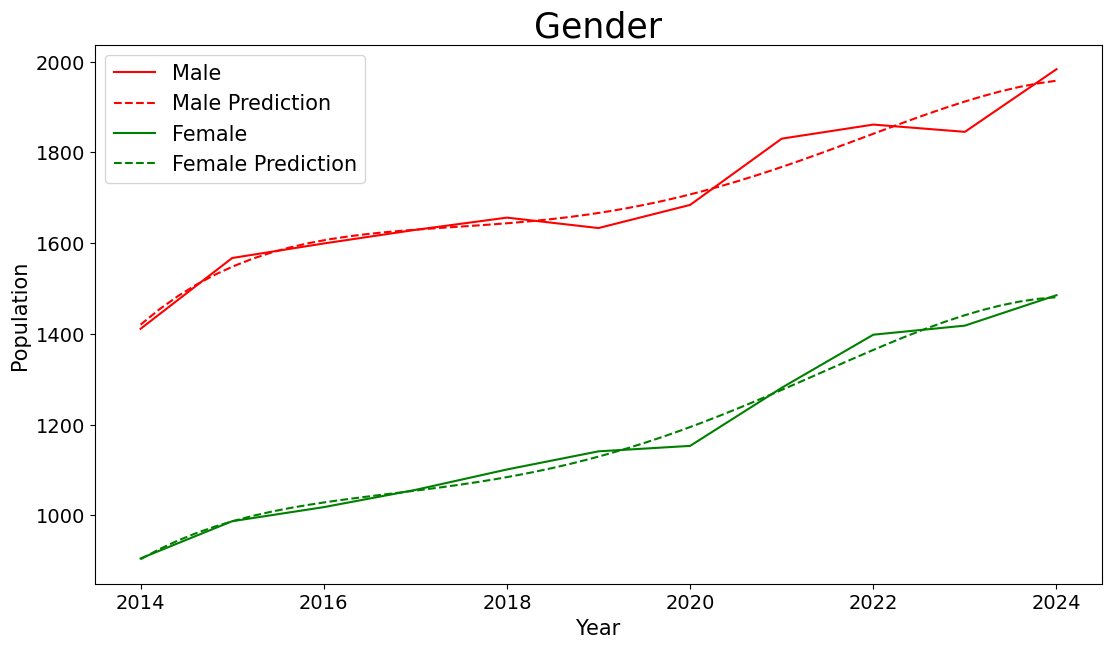

{'Male': array([1946.96972656, 1840.24804688, 1589.88769531]),
 'Female': array([1450.46972656, 1310.53125   , 1013.16699219])}

In [9]:
df = faculty
faculty_prediction(4, ['Male', 'Female'])

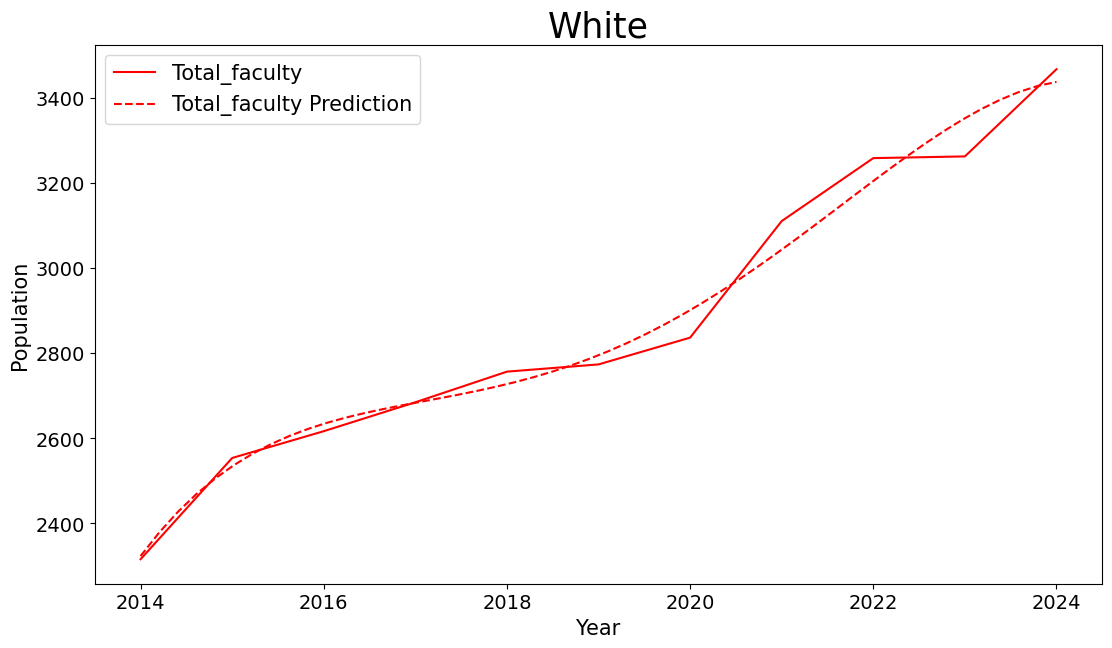

{'Total_faculty': array([3397.41210938, 3150.74804688, 2603.02929688])}

In [10]:
faculty_prediction(4, ['Total_faculty'])

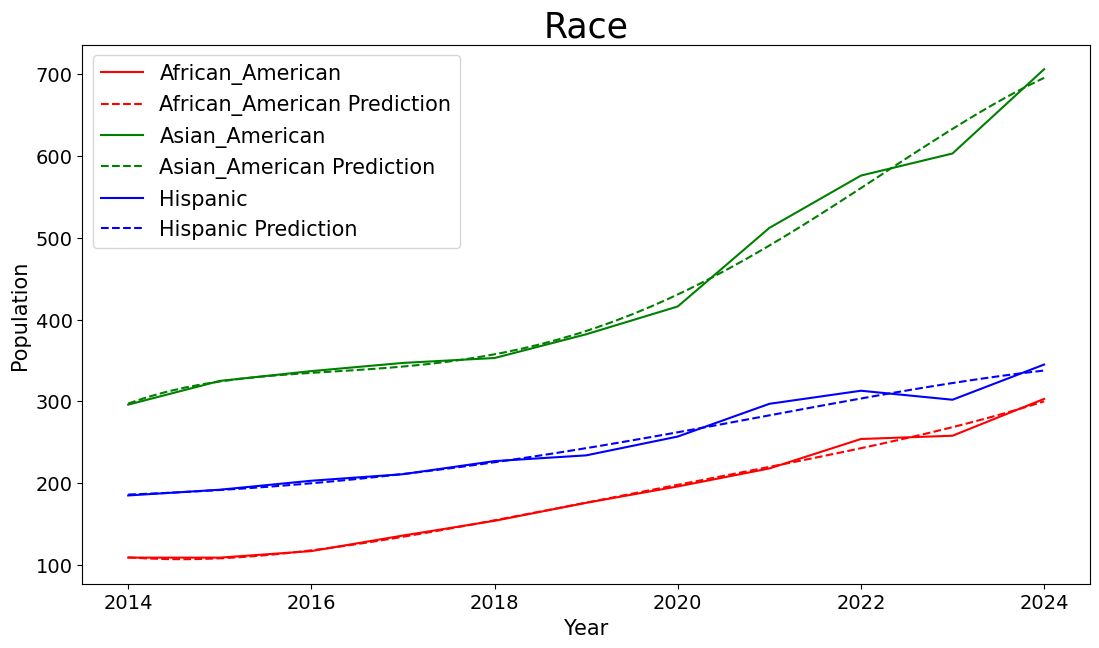

{'African_American': array([341.21313477, 397.12207031, 473.6953125 ]),
 'Asian_American': array([732.25      , 723.99609375, 647.67285156]),
 'Hispanic': array([347.00357056, 347.73706055, 336.915802  ])}

In [11]:
faculty_prediction(4, ['African_American', 'Asian_American', 'Hispanic'])

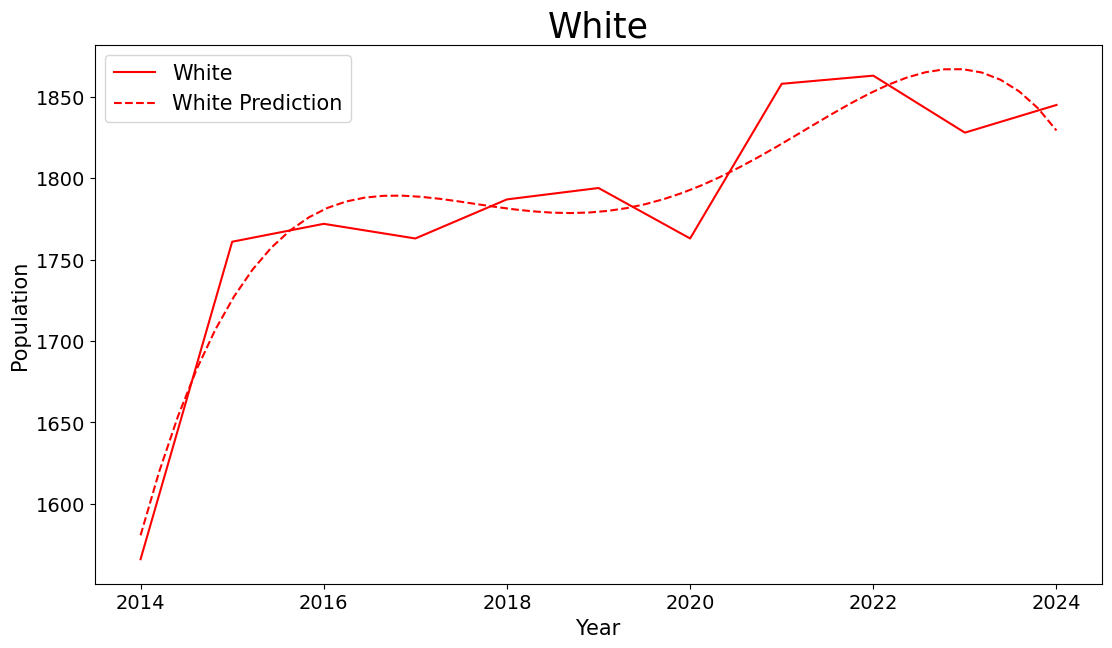

{'White': array([1697.15429688, 1416.09472656,  921.16601562])}

In [12]:
faculty_prediction(4, ['White'])

In [13]:
white[1:]

[1761, 1772, 1763, 1787, 1794, 1763, 1858, 1863, 1828, 1845]

In [14]:
[i for i in range(2015, 2025)]

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [15]:
faculty.White[1:]

1     1761
2     1772
3     1763
4     1787
5     1794
6     1763
7     1858
8     1863
9     1828
10    1845
Name: White, dtype: int64

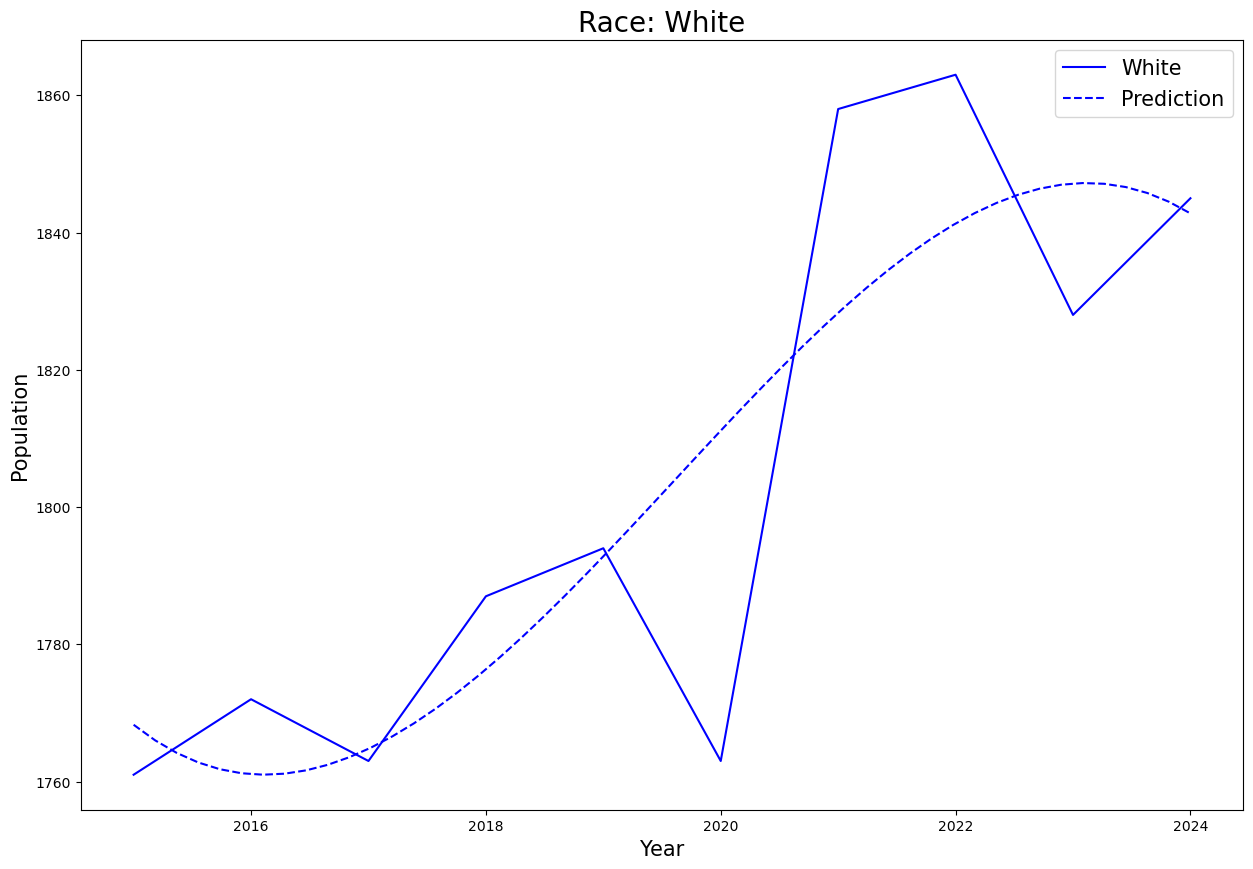

In [16]:
## Remove 2014 data point for White Population

deg = 3
# Create a polynomial function
p_white = np.poly1d(np.polyfit([i for i in range(2015, 2025)], faculty.White[1:], deg))

# Predict y values for new x values
x_new = np.linspace(2015, 2024)
y_predicted_white = p_white(x_new)

plt.figure(figsize=(15, 10))
plt.plot(faculty.Year[1:], faculty.White[1:], color = 'b', label = 'White')
plt.plot(x_new, y_predicted_white, linestyle = '--', color = 'b', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Race: White', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [17]:
faculty[faculty.Year == 2024].index[0]

10

In [18]:
faculty.head()

,Year,Total_faculty,Male,Female,African_American,Asian_American,Hispanic,White
0,2014,2316,1411,905,109,296,185,1566
1,2015,2554,1567,987,109,325,192,1761
2,2016,2617,1599,1018,117,337,203,1772
3,2017,2685,1629,1056,136,347,211,1763
4,2018,2757,1656,1101,154,353,227,1787


In [19]:
faculty[faculty.Year == 2024]

,Year,Total_faculty,Male,Female,African_American,Asian_American,Hispanic,White
10,2024,3468,1983,1485,303,706,345,1845


In [20]:
faculty[faculty.Year == 2024].index[0]

10

In [21]:
temp = list(faculty.iloc[-3:].White)

In [22]:
prediction = {}
prediction['White'] = []
print(temp)
for i in range(3):
    pred = np.mean(temp)
    temp[0] = temp[1]
    temp[1] = temp[2]
    temp[2] = pred
    print(temp)
    prediction['White'].append(pred)

prediction

[1863, 1828, 1845]
[1828, 1845, 1845.3333333333333]
[1845, 1845.3333333333333, 1839.4444444444443]
[1845.3333333333333, 1839.4444444444443, 1843.2592592592591]


{'White': [1845.3333333333333, 1839.4444444444443, 1843.2592592592591]}